---

#  tlines issue425


---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf
mpf.__version__

'0.12.7a18'

In [3]:
import yfinance as yf

In [4]:
tickername = "AAPL"
Ticker = yf.Ticker(tickername)
df = Ticker.history(period='1d', interval='1m', start='2021-08-02', end='2021-08-04')

In [5]:
df.index = pd.DatetimeIndex(df.index.tz_localize(None).to_pydatetime())
df = df[['Open','High','Low','Close','Volume']]

In [6]:
df

,Open,High,Low,Close,Volume
2021-08-02 09:30:00,146.360001,146.949997,146.330002,146.470001,2281385
2021-08-02 09:31:00,146.490005,146.820007,146.440002,146.615005,423278
2021-08-02 09:32:00,146.615005,146.619904,146.169998,146.289993,421220
2021-08-02 09:33:00,146.289993,146.399994,146.089996,146.345703,410815
2021-08-02 09:34:00,146.339996,146.470001,146.190002,146.419998,393832
...,...,...,...,...,...
2021-08-03 15:55:00,147.300003,147.369995,147.270996,147.289993,249385
2021-08-03 15:56:00,147.300003,147.429993,147.279999,147.389999,481793
2021-08-03 15:57:00,147.389999,147.449997,147.360001,147.427505,306086
2021-08-03 15:58:00,147.419998,147.427200,147.139999,147.330002,396355


In [7]:
df = df.resample('5T').agg(
    {'Open'  :'first',
     'High'  :'max',
     'Low'   :'min',
     'Close' :'last',
     'Volume':'sum'
    }).dropna()

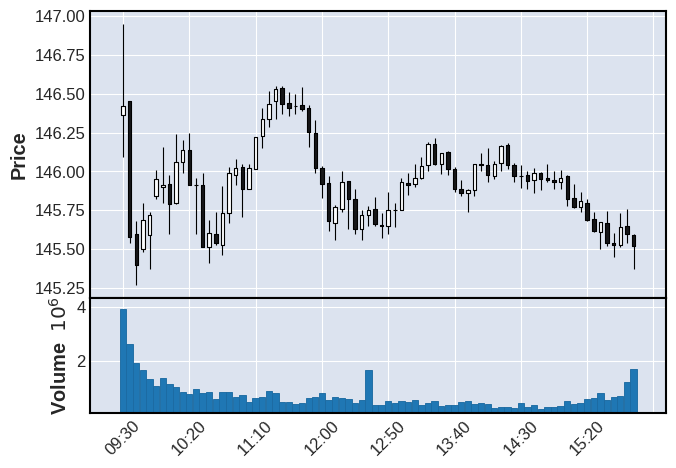

In [8]:
fig, axlist = mpf.plot(df.loc['2021-08-02'],type='candle',volume=True,returnfig=True)

In [9]:
df.index

DatetimeIndex(['2021-08-02 09:30:00', '2021-08-02 09:35:00',
               '2021-08-02 09:40:00', '2021-08-02 09:45:00',
               '2021-08-02 09:50:00', '2021-08-02 09:55:00',
               '2021-08-02 10:00:00', '2021-08-02 10:05:00',
               '2021-08-02 10:10:00', '2021-08-02 10:15:00',
               ...
               '2021-08-03 15:10:00', '2021-08-03 15:15:00',
               '2021-08-03 15:20:00', '2021-08-03 15:25:00',
               '2021-08-03 15:30:00', '2021-08-03 15:35:00',
               '2021-08-03 15:40:00', '2021-08-03 15:45:00',
               '2021-08-03 15:50:00', '2021-08-03 15:55:00'],
              dtype='datetime64[ns]', length=156, freq=None)

In [10]:
df.index.get_loc('2021-08-02 09:30:00')
df.index.get_loc('2021-08-02 10:30:00')

0

12

In [11]:
ticklocations = []
ticks = pd.date_range('2021-08-02 09:30:00','2021-08-02 15:55:00',freq='30min')
ticks

DatetimeIndex(['2021-08-02 09:30:00', '2021-08-02 10:00:00',
               '2021-08-02 10:30:00', '2021-08-02 11:00:00',
               '2021-08-02 11:30:00', '2021-08-02 12:00:00',
               '2021-08-02 12:30:00', '2021-08-02 13:00:00',
               '2021-08-02 13:30:00', '2021-08-02 14:00:00',
               '2021-08-02 14:30:00', '2021-08-02 15:00:00',
               '2021-08-02 15:30:00'],
              dtype='datetime64[ns]', freq='30T')

In [12]:
ticklocations = [df.index.get_loc(tick) for tick in ticks]
ticklocations

[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72]

In [13]:
ticklabels = [ tick.time().strftime('%H:%M') for tick in ticks ]
print(ticklabels)

['09:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30']


In [14]:
axlist[2].xaxis.set_ticks(ticklocations)
axlist[2].set_xticklabels(ticklabels)

[Text(0, 0, '09:30'),
 Text(6, 0, '10:00'),
 Text(12, 0, '10:30'),
 Text(18, 0, '11:00'),
 Text(24, 0, '11:30'),
 Text(30, 0, '12:00'),
 Text(36, 0, '12:30'),
 Text(42, 0, '13:00'),
 Text(48, 0, '13:30'),
 Text(54, 0, '14:00'),
 Text(60, 0, '14:30'),
 Text(66, 0, '15:00'),
 Text(72, 0, '15:30')]

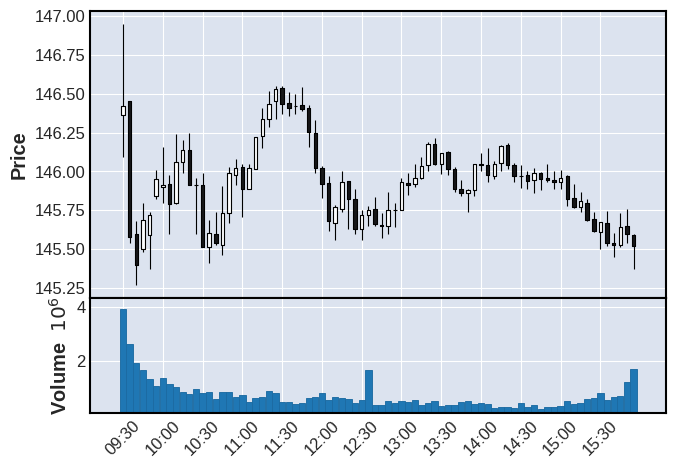

In [15]:
fig